<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/P3-Practica-Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⭕ Práctica de clasificación

## 1. Práctica en clase



Vamos a trabajar con el dataset PIMA. El objetivo es

 *Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?*

Número de embarazos (Pregnancies):

    Cantidad total de embarazos que la paciente ha tenido.

Concentración de glucosa en plasma (Glucose):

    Nivel de glucosa en sangre a 2 horas en una prueba de tolerancia oral a la glucosa (mg/dL).

    Valores normales: 70–99 mg/dL (en ayunas).

Presión arterial diastólica (BloodPressure):

    Presión sanguínea en mm Hg.

    Valor normal: ≈80 mm Hg.

Grosor del pliegue cutáneo (SkinThickness):

    Medida (en mm) del pliegue cutáneo del tríceps para estimar grasa corporal.

    Valor normal: 10–40 mm.

Insulina sérica (Insulin):

    Nivel de insulina en sangre a 2 horas (muU/mL).

    Valor normal en ayunas: 2–25 μU/mL.

Índice de masa corporal (IMC) (BMI):

    Peso (kg) / altura² (m²).

    Rango saludable: 18.5–24.9.

Función pedigrí de diabetes (DiabetesPedigreeFunction):

    Puntuación que estima la influencia genética basada en antecedentes familiares de diabetes.

    Valor alto: Mayor riesgo genético.

Edad (Age):

    Edad de la paciente en años.

Resultado (Outcome):

    0: No diabetes.

    1: Diabetes diagnosticada.

Vamos a construir dos modelos de clasificación y compararlos

¿Qué clasificador tiene mejor rendimiento en este dataset? Para esto **toma en cuenta el recall en el conjunto de prueba**.

Leamos el dataset

In [1]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/diabetes.csv'
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Usa el método describe del dataframe para observar los rangos de los datos

In [2]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Los ceros en varias columnas representan valores faltantes,

🔵 ¿En cuáles columnas no tienen sentido los valores 0?

Observa los ceros en algunas de estas columnas donde no tienen sentido los ceros

In [3]:
#¿hay valores faltantes?
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [4]:
df[df['Insulin']==0].shape

(374, 9)

🔴 **OPCIONAL**: Haz imputación de los datos con valores 0 en las columnas que consideres necesario

In [6]:
from sklearn.impute import SimpleImputer
#usando el promedio para la imputacion (pero solo al final)
imputer = SimpleImputer(missing_values=0, strategy='mean')
imputer_values = imputer.fit_transform(df.iloc[:,1:-1])

#se le asignan los valores imputados
df.iloc[:,1:-1]=imputer_values

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


🔴 Divide el dataset en train/test usando 80% para entrenamiento

In [101]:
from sklearn.model_selection import train_test_split
#dividimos los datos:
X = df.drop(columns= ['Outcome']).values #features
y = df['Outcome'].values #target

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=872)
print(f"Variables X: {X.shape}")
print(f"Resultado y: {y.shape}")

Variables X: (768, 8)
Resultado y: (768,)


🔴 Re escala los datos usando MinMaxScaler o StandardScaler. Recuerda el **data leakage**

🔴 Entrena un modelo de SVM y evalua usando la métrica recall en el conjunto de prueba, comparala con el recall en el conjunto de entrenamiento. ¿Hay señales de overfitting?

In [102]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


In [150]:
from sklearn.metrics import f1_score, recall_score, confusion_matrix , accuracy_score
pl = Pipeline([
            ('scaler', MinMaxScaler()),
            ('clf', SVC(kernel='rbf', C=10))])

pl.fit(X_train, y_train)

y_pred_test = pl.predict(X_test)
#para saber si le atinó (en el entrenamiento)
y_pred_train = pl.predict(X_train)

recall = recall_score(y_test, y_pred_test)
recall2= recall_score(y_train, y_pred_train)

print(f"Recall en entrenamiento: {recall2}")
print(f"Recall en prueba: {recall}")


print("---------------------------------------------")
accuracy1= accuracy_score(y_test, y_pred_test)
accuracy2 =accuracy_score(y_train, y_pred_train)
print(f"Accuracy en entrenamiento:{accuracy2}")
print(f"Accuracy en test: {accuracy1}")

Recall en entrenamiento: 0.7142857142857143
Recall en prueba: 0.5
---------------------------------------------
Accuracy en entrenamiento:0.8534201954397395
Accuracy en test: 0.7207792207792207


🔴 Entrena un modelo de Decision Tree / Random Forest y evalua usando la métrica recall en el conjunto de prueba, comparala con el recall en el conjunto de entrenamiento. ¿Hay señales de overfitting?

En este modelo, ¿cuáles son las variables más importantes para predecir la diabetes? ¿Tiene sentido la conclusión?

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=872)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")


Tamaño del conjunto de entrenamiento: 614
Tamaño del conjunto de prueba: 154


In [140]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score


clf = RandomForestClassifier(max_depth=5, random_state=42, n_estimators=5)
clf = clf.fit(X_train,y_train)  # Train Decision Tree Classifier
y_test_pred = clf.predict(X_test)    # Predict the response for test dataset
y_train_pred = clf.predict(X_train)


print(f"Recall en entrenamiento: {round(recall_score(y_train,y_train_pred),5)}")
print(f"Recall en prueba: {round(recall_score(y_test,y_test_pred),5)}")


print("---------------------------------------------")
accuracy1= accuracy_score(y_test, y_test_pred)
accuracy2 =accuracy_score(y_train, y_train_pred)
print(f"Accuracy en entrenamiento:{accuracy2}")
print(f"Accuracy en test: {accuracy1}")


Recall en entrenamiento: 0.7381
Recall en prueba: 0.51724
---------------------------------------------
Accuracy en entrenamiento:0.8469055374592834
Accuracy en test: 0.7402597402597403


In [98]:
print(df.columns.to_list()[:-1])

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [99]:
print(clf.feature_importances_)

[0.07738519 0.21216023 0.04244014 0.03558297 0.14151108 0.22353444
 0.10364641 0.16373953]


,Variable,Importancia
5,BMI,0.223534
1,Glucose,0.212160
7,Age,0.163740
4,Insulin,0.141511
6,DiabetesPedigreeFunction,0.103646
0,Pregnancies,0.077385
2,BloodPressure,0.042440
3,SkinThickness,0.035583


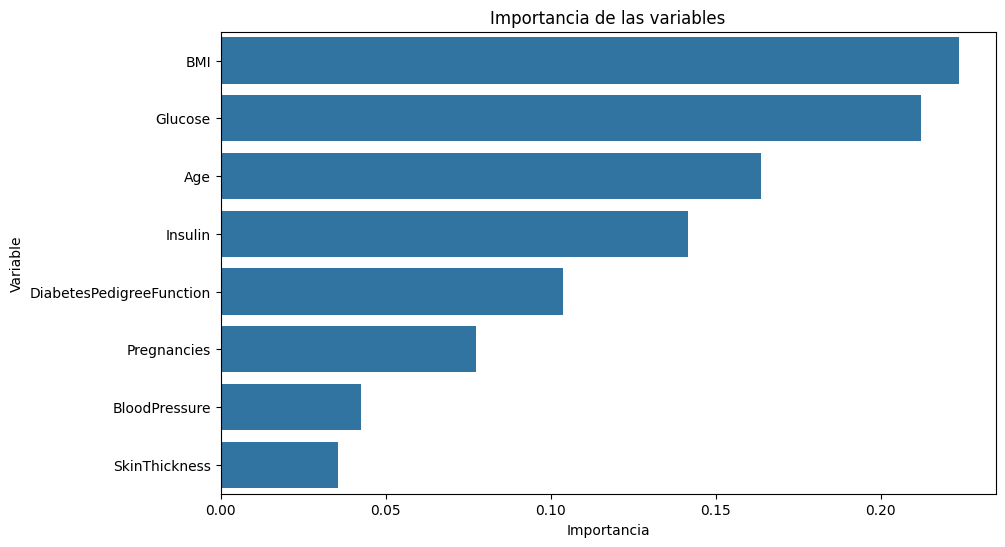

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

importancia_df = pd.DataFrame({
    "Variable": df.drop(columns=['Outcome']).columns,
    "Importancia": clf.feature_importances_})
importancia_df = importancia_df.sort_values(by="Importancia", ascending=False)
display(importancia_df)

plt.figure(figsize=(10,6))
sns.barplot(x="Importancia", y="Variable", data=importancia_df)
plt.title("Importancia de las variables")
plt.show()


🔴 🔴 Realiza un grid search usando los parámetros descritos a continuación:

Modelo 1:
* SVM
 * C: 0.1,1,10,100
 * kernel: lineal, polinomial, rbf
 * grados (polinomial): 2,3,5

Modelo 2. Escoge uno de los siguientes:
* Decision Tree
 * criterion: gini, entropy, log_loss
 * max_depth: None, 10, 20,
 * min_samples_split: 2, 3, 5
* Random Forest
 * criterion: gini, entropy, log_loss
 * max_depth: None, 10, 20,
 * min_samples_split: 2, 3, 5
* Regresión Logística
 * C: 0.1,1,10
 * penalty: l1, l2, elasticnet, None